Repurposing A4 for group project - working out ideas

From A4:
    - 

In [5]:
#import libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [11]:
us_dfs = [pd.read_csv('./A4_TRI_Data/A4_TRI_%d_US.csv' % x).drop('Unnamed: 0', axis=1) for x in range(1987,2017)]
us_dfs[0]

,YEAR,INDUSTRY_SECTOR,TOTAL_RELEASES,RECYCLED_TOTAL
0,1987,Miscellaneous Manufacturing,0.0,0
1,1987,Fabricated Metals,59185.0,0
2,1987,Food,0.0,0
3,1987,Plastics and Rubber,500.0,0
4,1987,Chemicals,50.0,0
5,1987,Computers and Electronic Products,74106.0,0
6,1987,Chemicals,250.0,0
7,1987,Chemicals,200.0,0
8,1987,Fabricated Metals,1000.0,0
9,1987,Chemicals,250.0,0


--------------------------------------

In [2]:
#start by analyzing 2016 data
us2016 = pd.read_csv('./A4_TRI_Data/A4_TRI_2016_US.csv').drop('Unnamed: 0', axis=1)[['YEAR','TOTAL_RELEASES']]
#trim out extreme outliers -3/+3 standard deviations out
origLen = len(us2016)
stdDevs = 3
outliers = us2016[np.abs(us2016.TOTAL_RELEASES-us2016.TOTAL_RELEASES.mean())>=(stdDevs*us2016.TOTAL_RELEASES.std())]
us2016 = us2016[np.abs(us2016.TOTAL_RELEASES-us2016.TOTAL_RELEASES.mean())<=(stdDevs*us2016.TOTAL_RELEASES.std())]
trimmedLen = len(us2016)

In [3]:
print '%.4f' % (len(outliers)/float(origLen))
print '%d values > %.3f standard deviations from the mean.' % ((origLen - trimmedLen),stdDevs)

0.0007
52 values > 3.000 standard deviations from the mean.


In [4]:
outlierSum = outliers['TOTAL_RELEASES'].sum()
sansOutlierSum = us2016['TOTAL_RELEASES'].sum()

totalReleases2016 = outlierSum + sansOutlierSum

print 'Outliers accounted for %%%.2f of total' % (100*outlierSum/float(totalReleases2016))
print 'Rest accounted for %%%.2f of total' % (100*sansOutlierSum/float(totalReleases2016))

Outliers accounted for %44.82 of total
Rest accounted for %55.18 of total


In [83]:
def basicStatsSummary(startYear, endYear):
    ymax = max(plt.gca().get_ylim())
    year_df_array = []
    
    for year in range(startYear, endYear+1):
        year_df = pd.read_csv('./A4_TRI_Data/A4_TRI_%s_US.csv' % year).drop('Unnamed: 0', axis=1)[['YEAR','TOTAL_RELEASES']]
        year_df = year_df[np.abs(year_df.TOTAL_RELEASES-year_df.TOTAL_RELEASES.mean())<=(3*year_df.TOTAL_RELEASES.std())]
        year_df_array.append({'year': year, 'df': year_df.TOTAL_RELEASES})
    
    for i in range(len(year_df_array)):
        year = year_df_array[i]['year']
        year_df_releases = year_df_array[i]['df']
        year_df_array[i]['total'] = year_df_releases.sum()
        year_df_array[i]['mean'] = year_df_releases.mean()
        year_df_array[i]['median'] = year_df_releases.median()

        
    return year_df_array
   
#apply previous methods to all years 1987-2016 and return so we can look at changes in stats over the period
year_df_objs = basicStatsSummary(1987,2016)

In [84]:
yearlist = [year_df_objs[i]['year'] for i in range(len(year_df_objs))]
totals = [year_df_objs[i]['total'] for i in range(len(year_df_objs))] 
means = [year_df_objs[i]['mean'] for i in range(len(year_df_objs))] 
medians = [year_df_objs[i]['median'] for i in range(len(year_df_objs))]

summary = pd.DataFrame({
    'Year': yearlist,
    'Total': totals,
    'Mean': means,
    'Median': medians
})

In [85]:
def plotSummaryAttr(col):
    summary[col].plot(kind='kde', title=('Distribution of %s 1987-2016' % col), xlim=(summary[col].min(),summary[col].max()))
    ymax = max(plt.gca().get_ylim())
    plt.vlines(summary[col].mean(),
               ymin=0, 
               ymax=ymax,
               linewidth=2.0)

    plt.vlines(summary[col].median(),
               ymin=0, 
               ymax=ymax,
               linewidth=2.0,
               color='red')
    
    plt.gca().set_ylim(0)
    plt.show()

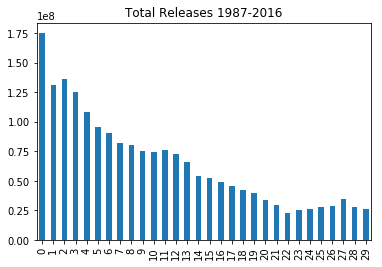

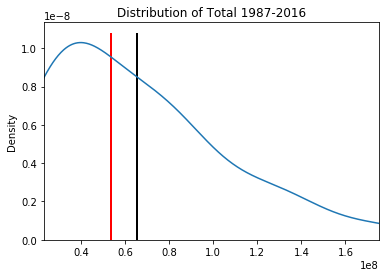

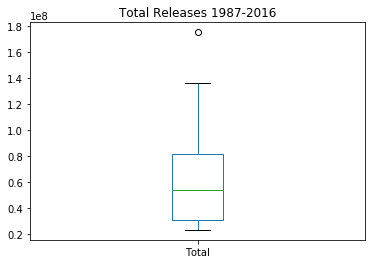

In [86]:
summary['Total'].plot(kind='bar', title='Total Releases 1987-2016')
plt.show()
plotSummaryAttr('Total')
summary['Total'].plot(kind='box', title='Total Releases 1987-2016')
plt.show()